<a href="https://colab.research.google.com/github/ChriRRojas/Biomedica-/blob/main/Im%C3%A1genes_m%C3%A9dicas_digitales_por_Rojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red"> Imágenes médicas digitales 🤘
> <font color="orange"> Actividad 9 | Instalaciones y seguridad radiológica

> **Por Christofer Martin Rojas Ruiz**


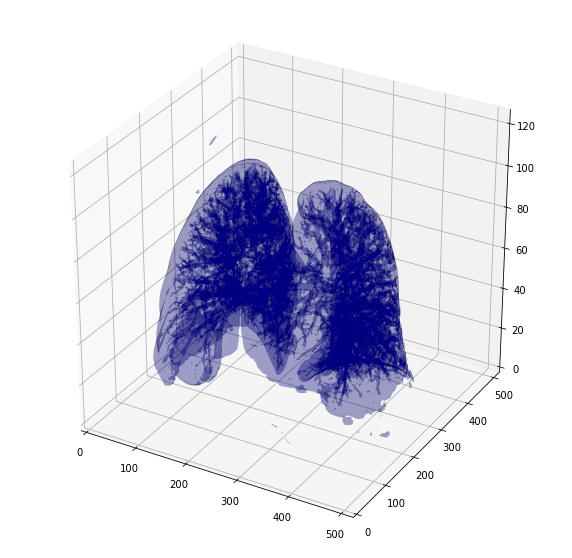

En esta actividad trabajaremos con una serie de imágenes de **tomografía computarizada**.

El **análisis de imágenes médicas es una herramienta** fundamental en el diagnóstico y seguimiento de enfermedades. Dentro de este campo, los archivos DICOM (Digital Imaging and Communications in Medicine) juegan un papel crucial, ya que no solo almacenan las imágenes obtenidas por modalidades como la tomografía computarizada (TC), sino también una gran cantidad de metadatos que contienen información vital sobre el paciente, los parámetros del estudio y la configuración del equipo. Estos datos aseguran que las imágenes puedan ser interpretadas correctamente y que se mantenga la integridad del proceso diagnóstico.

Uno de los retos principales al trabajar con imágenes DICOM es la necesidad de organizarlas adecuadamente para reconstruir un volumen tridimensional. Si los cortes no se ordenan según su posición real, la reconstrucción se verá distorsionada, comprometiendo la visualización de estructuras anatómicas. Esta organización permite extraer diferentes vistas del cuerpo en los planos axial, coronal y sagital, cada uno ofreciendo una perspectiva única que ayuda a los especialistas a obtener una comprensión más completa del paciente.

**Echemos un vistaso a este tipo de archivos (especificamente de *Computer tomography*).**


In [ ]:
# Importar modulos que usaremos
import gdown # Para descargar archivos desde google drive
!pip install pydicom --quiet # Descargamos la libreria de pydicom
import pydicom as dicom # Para leer archivos dicom
import matplotlib.pyplot as plt # Para visualizacion de imágenes y gráficos
import numpy as np # Para manejo de datos multidimensionales y álgebra lineal
import os # Para manejo de rutas y paths
import random # Para números aleatorios

In [2]:
# Descargaremos la carpeta con las imágenes de CT en la instancia de Google Colab
!gdown --id 1PL6xRQHKnGdpM8DSR_qUafOgc_4AZ5kW -O /content/dataset.zip # Se descarga la carpeta comprimida que contiene las imágenes de CT
!unzip /content/dataset.zip -d /content/CT_images # Descomprimimos la carpeta en zip #Quitamos --->quite

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1PL6xRQHKnGdpM8DSR_qUafOgc_4AZ5kW
From (redirected): https://drive.google.com/uc?id=1PL6xRQHKnGdpM8DSR_qUafOgc_4AZ5kW&confirm=t&uuid=273e2cd5-6b61-414b-9b41-f99dd560ac1f
To: /content/dataset.zip
100% 130M/130M [00:01<00:00, 76.0MB/s]
Archive:  /content/dataset.zip
  inflating: /content/CT_images/CT/DICOM/Img_712  
  inflating: /content/CT_images/CT/DICOM/Img_709  
  inflating: /content/CT_images/CT/DICOM/Img_705  
  inflating: /content/CT_images/CT/DICOM/Img_701  
  inflating: /content/CT_images/CT/DICOM/Img_716  
  inflating: /content/CT_images/CT/DICOM/Img_696  
  inflating: /content/CT_images/CT/DICOM/Img_711  
  inflating: /content/CT_images/CT/DICOM/Img_703  
  inflating: /content/CT_images/CT/DICOM/Im

## <font color="green">Imágenes DICOM
El formato DICOM (**Digital Imaging and Communications in Medicine**) es el estándar internacional para imágenes médicas e información relacionada. Este formato está presente en casi cualquier equipo radiológico en distintos dominios y campos de la medicina como la radiología, cardiología, rayos X, MRI, TC, etc.

DICOM está reconocido por la Organización Internacional de Estandarización (ISO) con la certificación ISO-12052.

Algunas de sus propiedades son:
* Almacenamiento de información de imágenes médicas junto con metadatos detallados (información del paciente, datos de adquisición, configuración del dispositivo)
* Estandarizado para facilitar la interoperabilidad entre sistemas y dispositivos médicos
* Soporte para imágenes bidimensionales y tridimensionales

A continuación, carguemos una imágen aleatoria:

In [3]:
# Creamos una lista con los nombres de las imágenes
carpeta_dicom = "/content/CT_images/CT/DICOM/"
archivos_dicom = [file for file in os.listdir(carpeta_dicom)]
archivos_dicom[0:5] # Mostramos los primeros 5 elementos

['Img_20', 'Img_579', 'Img_312', 'Img_708', 'Img_523']

In [4]:
# Seleccionar un archivo DICOM aleatorio
dicom_aleatorio = random.choice(archivos_dicom)
ruta_dicom = os.path.join(carpeta_dicom, dicom_aleatorio)

# Cargar el archivo DICOM
dicom_data = dicom.dcmread(ruta_dicom)
print(dicom_data)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 210
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.334704376833990701330519098973599386832
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002,0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0012) Instance Creation Date              DA: '20190311'
(0008,0013) Instance Creation Time              TM: '140953'
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Ins

/usr/local/lib/python3.11/dist-packages/pydicom/valuerep.py:440: UserWarning: The value length (20) exceeds the maximum length of 16 allowed for VR SH.
  warn_and_log(msg)


In [5]:
#Modificar Valores
dicom_data.InstitutionName = 'Cutlajo_Leoncitos_negreros'
dicom_data.StationName= 'Inges Biomedica 25A'

/usr/local/lib/python3.11/dist-packages/pydicom/valuerep.py:440: UserWarning: The value length (19) exceeds the maximum length of 16 allowed for VR SH.
  warn_and_log(msg)


### Visualización de imagen DICOM
Ahora visualizaremos la imagen seleccionada. Notese que dentro del objeto `dicom_data` existen varios campos y atributos que nos proporcionan información tanto del procedimiento realizado como de la imagen para su visualización. La información de la imagen se encuentra almecenada en `dicom_data.pixel_array`.

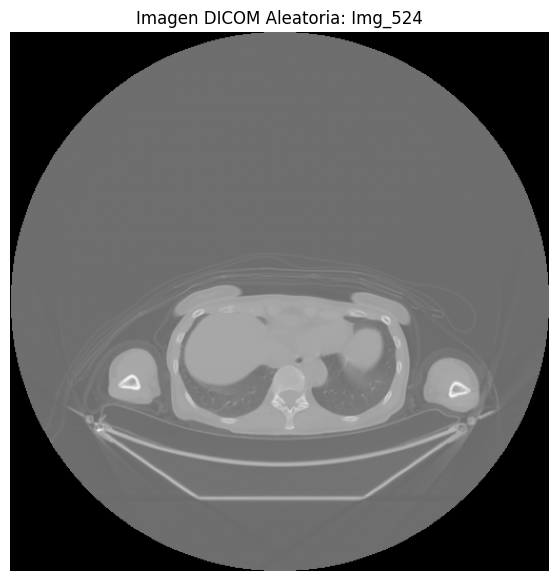

In [6]:
# Obtener la imagen y mostrarla con matplotlib
plt.figure(figsize=(7, 7))
plt.imshow(dicom_data.pixel_array, cmap="gray")
plt.axis("off")
plt.title(f"Imagen DICOM Aleatoria: {dicom_aleatorio}")
plt.show()

# Unidades Hounsfield
La información numérica de cada pixel de la imagen está representada en **Unidades Hounsfield**. Estos valores se encuentran en un intervalo desde -1000 (aire) hasta el +3000 (hueso denso). Un pixel con valor de 0 representa agua.

Veamos que dentro de `dicom_data` encontramos dos propiedades `RescaleIntercept` y `RescaleSlope`. Estos valores nos permitirán ajustar los valores de los pixeles para una adecuada visualización.

In [7]:
# Convertir a unidades HU (si tiene intercept y slope)
if 'RescaleIntercept' in dicom_data and 'RescaleSlope' in dicom_data:
    intercept = dicom_data.RescaleIntercept
    slope = dicom_data.RescaleSlope
    image_data = dicom_data.pixel_array * slope + intercept

## **Funcionamiento de las Ventanas en Unidades Hounsfield (HU)**

En tomografía computarizada (CT), las imágenes pueden contener un amplio rango de valores en **Unidades Hounsfield (HU)**, que van aproximadamente de **-1000 HU (aire) a +3000 HU (hueso denso o metal)**. Sin embargo, la pantalla de un monitor solo puede mostrar una escala de grises limitada, por lo que se utilizan **ventanas de visualización** para resaltar estructuras de interés.

---

### **Parámetros Clave de la Ventana**
Una ventana de visualización se define por dos parámetros principales:

1. **Nivel de ventana (Window Level, WL)**  
   - Representa el valor central de HU que se desea visualizar con más detalle.
   - Generalmente coincide con la densidad del tejido de interés.
   
2. **Ancho de ventana (Window Width, WW)**  
   - Define el rango de HU que se mapeará en la escala de grises.
   - Valores **dentro del rango** se distribuyen entre el negro (mínimo) y el blanco (máximo).
   - Valores **fuera del rango** se truncarán a negro (menor que el mínimo) o blanco (mayor que el máximo).

#### **Fórmulas para los límites de la ventana**
```
HU_min = WL - (WW / 2)
HU_max = WL + (WW / 2)
```
Cualquier píxel con valor **por debajo** de `HU_min` se muestra como **negro**, y cualquier píxel **por encima** de `HU_max` se muestra como **blanco**. Los valores intermedios se distribuyen en niveles de gris.

---

### **Ejemplo de Ventanas para Diferentes Tejidos**
Cada tipo de tejido se visualiza mejor con diferentes configuraciones de ventana:

| Tipo de Tejido | Nivel de Ventana (WL) | Ancho de Ventana (WW) | Rango de HU Visualizado |
|---------------|----------------|----------------|---------------------|
| **Pulmonar** (para resaltar estructuras aéreas) | -500 HU | 1500 HU | -1250 a +250 HU |
| **Partes blandas** (tejidos, órganos) | 40 HU | 350 HU | -135 a +215 HU |
| **Óseo** (resaltar huesos) | 400 HU | 1800 HU | -500 a +1400 HU |

---

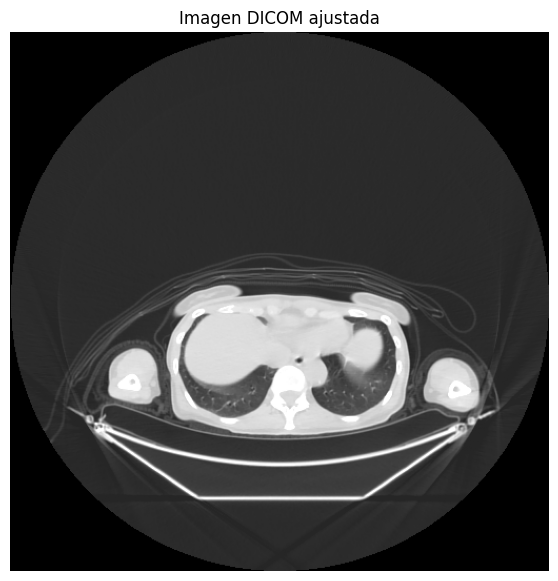

In [8]:
# Definir rango de visualización en HU (ejemplo: ventana para tejido blando)
window_level = -500  # Nivel de ventana 'WL'
window_width = 	1500  # Ancho de ventana 'WW'
min_hu = window_level - (window_width / 2)
max_hu = window_level + (window_width / 2)

# Escalar la imagen al rango deseado
image_data_scaled = np.clip(image_data, min_hu, max_hu)
image_data_scaled = (image_data_scaled - min_hu) / (max_hu - min_hu)  # Normalizar entre 0 y 1

# Mostrar la imagen ajustada
plt.figure(figsize=(7, 7))  # Ajusta el tamaño en pulgadas
plt.imshow(image_data_scaled, cmap="gray")
plt.title("Imagen DICOM ajustada")
plt.axis("off")
plt.show()

In [9]:
# Convertir a unidades HU (si tiene intercept y slope)
if 'RescaleIntercept' in dicom_data and 'RescaleSlope' in dicom_data:
    intercept = dicom_data.RescaleIntercept
    slope = dicom_data.RescaleSlope
    image_data = dicom_data.pixel_array * slope + intercept

## <font color="red">Muestra los tres planos (axial, digital, sagital) de una imagen dicom.

**Preguntas de evaluación:**
1. Fundamentos de imágenes médicas
* ¿Qué información contienen los archivos DICOM además de la imagen?
* ¿Por qué es necesario ordenar las imágenes DICOM antes de construir un volumen 3D?

2. Procesamiento y transformación de datos
* ¿Qué representan las unidades Hounsfield en una imagen de tomografía computarizada?
* ¿Cómo afecta la selección de la ventana (window level y window width) a la visualización de la imagen?

3. Visualización en diferentes planos
* ¿Qué diferencias existen entre los planos axial, coronal y sagital en la visualización de imágenes médicas?
* ¿Cómo se extraen los cortes en cada uno de estos planos a partir de un volumen tridimensional de imágenes?

4. Interpretación de resultados
* ¿Cómo podrías determinar si la orientación de la imagen en un determinado plano es la correcta?
* ¿Qué ajustes podrías hacer si la imagen en un plano específico se ve distorsionada o no tiene el contraste adecuado?

5. Extensión del conocimiento
* ¿Cómo podrías modificar el código para permitir la exploración interactiva del volumen en los tres planos en lugar de solo visualizar cortes predefinidos?
* ¿Qué ventajas ofrece la visualización en múltiples planos para el diagnóstico médico?

 <font color="green">¿Qué información contienen los archivos DICOM además de la imagen?

>Los archivos DICOM contienen no solo la imagen médica, sino también metadatos importantes. Estos incluyen los datos del paciente (nombre, edad, sexo), información sobre el estudio (fecha, tipo de imagen, descripción), detalles técnicos del escáner (tamaño de píxel, espesor de corte, energía del escáner), y la orientación de la imagen. Estos metadatos son esenciales para interpretar la imagen correctamente y asegurar que se visualiza en la posición adecuada.

*Recuperdo de https://github.com/pydicom*

>*Repitamos los pasos que hemos realizados para responder estas pregundas...*

In [10]:
# Seleccionar un archivo DICOM aleatorio
dicom_aleatorio = random.choice(archivos_dicom)
ruta_dicom = os.path.join(carpeta_dicom, dicom_aleatorio)

# Cargar el archivo DICOM
dicom_data = dicom.dcmread(ruta_dicom)
print(dicom_data)

# Ruta a la carpeta que contiene la serie DICOM
dicom_folder_path = carpeta_dicom

# Cargar todas las imágenes DICOM en la carpeta
dicom_files = [os.path.join(dicom_folder_path, f) for f in os.listdir(dicom_folder_path)]
dicom_slices = [dicom.dcmread(f) for f in dicom_files]

# Ordenar las imágenes por InstanceNumber (o SliceLocation si aplica)
dicom_slices.sort(key=lambda x: int(x.InstanceNumber))

# Crear una matriz 3D con los datos de los pixeles
volume_3d = np.stack([s.pixel_array for s in dicom_slices])

# Convertir a unidades HU
if 'RescaleIntercept' in dicom_slices[0] and 'RescaleSlope' in dicom_slices[0]:
    intercept = dicom_slices[0].RescaleIntercept
    slope = dicom_slices[0].RescaleSlope
    volume_3d = volume_3d * slope + intercept
else:
    print("Advertencia: No se encontraron RescaleIntercept y RescaleSlope en los metadatos. Los valores no están en HU.")

# Función para mostrar un plano de corte
def show_plane(volume, plane="axial", slice_index=None, window_level=40, window_width=350):
    # Ajustar la ventana para mostrar un rango específico de HU
    min_hu = window_level - (window_width / 2)
    max_hu = window_level + (window_width / 2)
    volume_display = np.clip(volume, min_hu, max_hu)  # Recortar valores al rango deseado
    volume_display = (volume_display - min_hu) / (max_hu - min_hu)  # Normalizar entre 0 y 1

    # Seleccionar el plano de corte
    if plane == "axial":
        slice_index = slice_index or volume.shape[0] // 2
        img = volume_display[slice_index, :, :]
        title = f"Plano Axial (Corte {slice_index})"
    elif plane == "coronal":
        slice_index = slice_index or volume.shape[1] // 2
        img = volume_display[:, slice_index, :]
        title = f"Plano Coronal (Corte {slice_index})"
    elif plane == "sagital":
        slice_index = slice_index or volume.shape[2] // 2
        img = volume_display[:, :, slice_index]
        title = f"Plano Sagital (Corte {slice_index})"
    else:
        raise ValueError("Plano no válido. Usa 'axial', 'coronal' o 'sagital'.")

    # Mostrar la imagen
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 210
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.75501182722061203723502378742378311967
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002,0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0012) Instance Creation Date              DA: '20190311'
(0008,0013) Instance Creation Time              TM: '140937'
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Inst

<font color="green"> ¿Por qué es necesario ordenar las imágenes DICOM antes de construir un volumen 3D?

Es necesario ordenarlas porque las imágenes se obtienen como cortes secuenciales del cuerpo. Si no están organizadas correctamente —usualmente por el "Instance Number" o "Slice Location"— el volumen 3D resultante podría verse mal ensamblado o deformado. Ordenarlas asegura que cada corte esté en su lugar, respetando la anatomía del paciente.

Se utiliza la linea:




```
# Cargar todas las imágenes DICOM en la carpeta
dicom_files = [os.path.join(dicom_folder_path, f) for f in os.listdir(dicom_folder_path)]
dicom_slices = [dicom.dcmread(f) for f in dicom_files]

# Ordenar las imágenes por InstanceNumber (o SliceLocation si aplica)
dicom_slices.sort(key=lambda x: int(x.InstanceNumber))
```
*Recuperdo de https://github.com/pydicom*




<font color="green">¿Qué representan las unidades Hounsfield en una imagen de tomografía computarizada?

Las unidades Hounsfield (HU) representan la densidad de los tejidos en una escala específica. El agua se define como 0 HU, el aire tiene -1000 HU, los tejidos blandos varían alrededor de 40 HU, y los huesos alcanzan más de 1000 HU. Esta escala permite distinguir entre diferentes tipos de tejidos dentro del cuerpo, facilitando la identificación de estructuras y posibles anomalías.

lo utilizamos en la linea de codigo:


```
# Convertir a unidades HU
if 'RescaleIntercept' in dicom_slices[0] and 'RescaleSlope' in dicom_slices[0]:
    intercept = dicom_slices[0].RescaleIntercept
    slope = dicom_slices[0].RescaleSlope
    volume_3d = volume_3d * slope + intercept
else:
    print("Advertencia: No se encontraron RescaleIntercept y RescaleSlope en los metadatos. Los valores no están en HU.")
```

*Recuperdo de https://github.com/pydicom*

<font color="green">¿Cómo afecta la selección de la ventana (window level y window width) a la visualización de la imagen?

El window level (nivel de la ventana) controla el punto medio de la escala de grises, mientras que el window width (ancho de la ventana) define el rango de valores visibles. Una ventana más estrecha resalta más el contraste entre los tejidos, pero puede perder detalles en áreas muy claras o muy oscuras. Una ventana más ancha muestra más detalles generales, pero disminuye el contraste entre estructuras cercanas en densidad. Por ejemplo, para visualizar mejor el cerebro, se usan ventanas estrechas, mientras que para los pulmones se usan ventanas más amplias.


```
# Definir rango de visualización en HU (ejemplo: ventana para tejido blando)
window_level = -500  # Nivel de ventana 'WL'
window_width = 	1500  # Ancho de ventana 'WW'
min_hu = window_level - (window_width / 2)
max_hu = window_level + (window_width / 2)
```

*Recuperdo de https://github.com/pydicom*

<font color="green">¿Qué diferencias existen entre los planos axial, coronal y sagital en la visualización de imágenes médicas?

El plano axial es una vista desde arriba hacia abajo, como si mirara el cuerpo desde la cabeza hacia los pies. El plano coronal es una vista frontal, como si el paciente estuviera de pie frente a mí. El plano sagital es una vista lateral que divide el cuerpo en mitad izquierda y derecha. Cada uno ofrece una perspectiva diferente y es útil para evaluar distintas estructuras según su orientación.

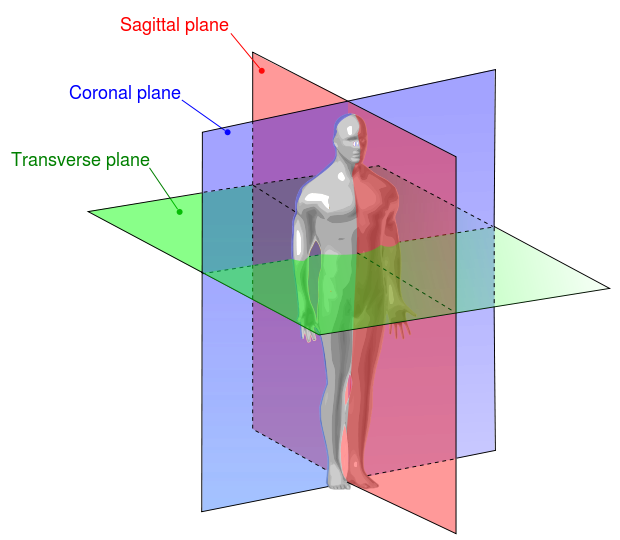

*Recuperdo de https://github.com/OmarAlkousa/DICOM-Using-Python/blob/main/Dealing_with_DICOM_using_%20ImageIO/Dealing_with_DICOM_using_%20ImageIO.ipynb*

<font color="green"> ¿Cómo se extraen los cortes en cada uno de estos planos a partir de un volumen tridimensional de imágenes?

Los cortes se extraen tomando secciones específicas de la matriz tridimensional que forma el volumen. Para el plano axial, se toman cortes a lo largo del eje Z. Para el plano coronal, se cortan los datos a lo largo del eje Y. Y para el plano sagital, los cortes se hacen a lo largo del eje X. Básicamente, estoy "rebanando" el volumen desde diferentes ángulos para obtener los planos que necesito.

<font color="green"> ¿Cómo podrías determinar si la orientación de la imagen en un determinado plano es la correcta?

Puedo revisar los metadatos DICOM, especialmente las etiquetas "ImagePositionPatient" y "ImageOrientationPatient", que describen cómo fue tomada la imagen. También puedo comparar la imagen con la anatomía conocida. Por ejemplo, en un corte axial, el hígado debería aparecer a la derecha del paciente (izquierda en la imagen).

*Recuperdo de https://github.com/OmarAlkousa/DICOM-Using-Python/tree/main*

Veamos como funciona en codigo:

In [11]:
# Mostrar los tres planos de corte
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

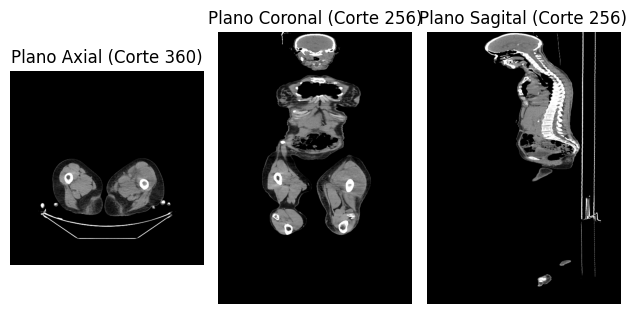

In [12]:
#Axial
plt.subplot(1, 3, 1)
slice_index_axial = volume_3d.shape[0] // 2
img_axial = volume_3d[slice_index_axial, :, :]

# Ajustar ventana para tejido blando
min_hu = 40 - (350 / 2)
max_hu = 40 + (350 / 2)
img_axial_display = np.clip(img_axial, min_hu, max_hu)
img_axial_display = (img_axial_display - min_hu) / (max_hu - min_hu)
plt.imshow(img_axial_display, cmap="gray")
plt.title(f"Plano Axial (Corte {slice_index_axial})")
plt.axis('off')

# Coronal
plt.subplot(1, 3, 2)
slice_index_coronal = volume_3d.shape[1] // 2
img_coronal = volume_3d[:, slice_index_coronal, :]
img_coronal_display = np.clip(img_coronal, min_hu, max_hu)
img_coronal_display = (img_coronal_display - min_hu) / (max_hu - min_hu)
plt.imshow(img_coronal_display, cmap="gray")
plt.title(f"Plano Coronal (Corte {slice_index_coronal})")
plt.axis('off')

# Sagital
plt.subplot(1, 3, 3)
slice_index_sagital = volume_3d.shape[2] // 2
img_sagital = volume_3d[:, :, slice_index_sagital]
img_sagital_display = np.clip(img_sagital, min_hu, max_hu)
img_sagital_display = (img_sagital_display - min_hu) / (max_hu - min_hu)
plt.imshow(img_sagital_display, cmap="gray")
plt.title(f"Plano Sagital (Corte {slice_index_sagital})")
plt.axis('off')

plt.tight_layout()
plt.show()

<font color="green">¿Qué ajustes podrías hacer si la imagen en un plano específico se ve distorsionada o no tiene el contraste adecuado?

Si la imagen está distorsionada, podría corregir la orientación usando los metadatos o rotando manualmente la imagen hasta que coincida con la anatomía esperada. Si el contraste es el problema, puedo ajustar la ventana (nivel y ancho) para resaltar mejor los tejidos que me interesan. También podría aplicar filtros de suavizado para reducir el ruido o mejorar los bordes si la imagen se ve borrosa.

*Recuperdo de https://github.com/a-m-farahani/CTU*

### **Veamos estos cohortes especificos (tipo de cohorte, contraste, numero de cohorte).** ✌

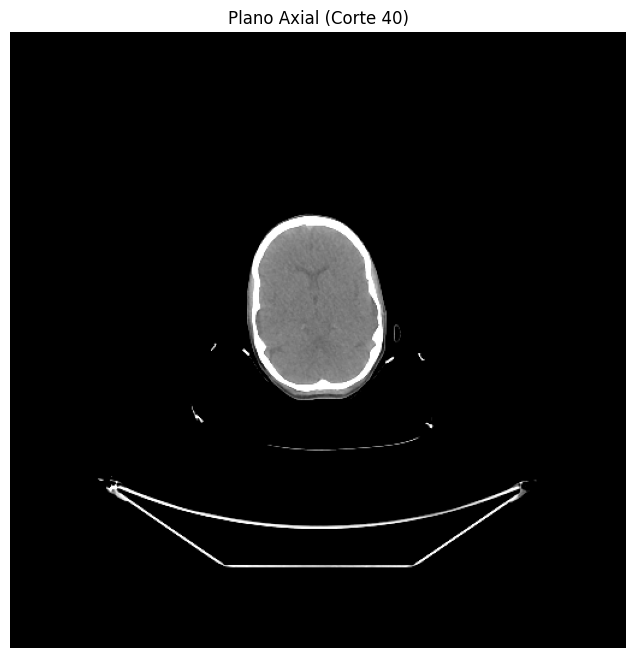

In [13]:
# Ejemplo de uso de la función show_plane para visualizar un corte específico
# Para visualizar un corte axial específico (por ejemplo, el corte 50)
show_plane(volume_3d, plane="axial", slice_index=40, window_level=40, window_width=350)



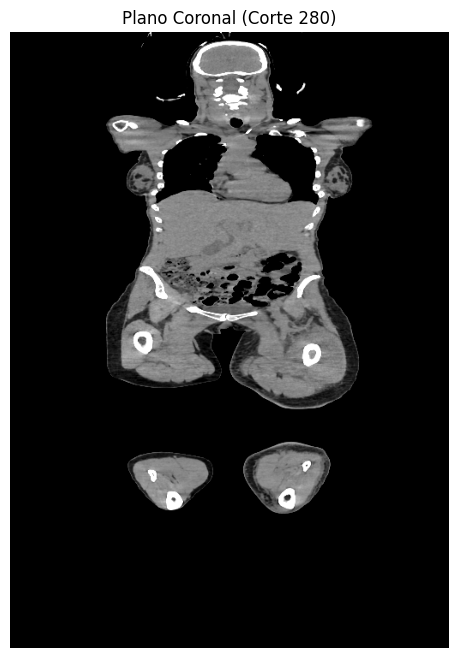

In [14]:
# Para visualizar un corte coronal específico
show_plane(volume_3d, plane="coronal", slice_index=280, window_level=40, window_width=350)


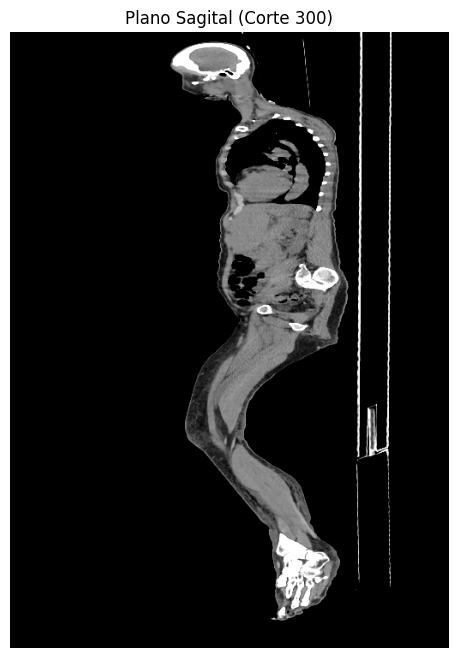

In [15]:
# Para visualizar un corte sagital específico
show_plane(volume_3d, plane="sagital", slice_index=300, window_level=40, window_width=350)

<font color="green">¿Cómo podrías modificar el código para permitir la exploración interactiva del volumen en los tres planos en lugar de solo visualizar cortes predefinidos?

Podría usar ipywidgets en Jupyter Notebook para agregar controles deslizantes interactivos que me permitan moverme a través de los cortes axiales, coronales y sagitales. De esta manera, puedo explorar libremente el volumen sin tener que generar cada corte manualmente. Sería como tener una miniaplicación directamente en el notebook.

Se encontro un codigo de una representacion monitor-visual para estas imagenes en Github y lo adapte a mi codigo. acontinuacion se muestra el ejercisio.

**Nota: NO es mia esta seccion de codigo saludos** 😲 🙏

*Recuperdo de https://dicom.innolitics.com/ciods/ct-image/image-plane/00180050 y https://github.com/OmarAlkousa/DICOM-Using-Python*


In [ ]:
# Importar modulos necesarios
import gdown
import pydicom as dicom
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from collections import defaultdict
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display

# Instalar ipywidgets si no está instalado
!pip install ipywidgets --quiet

# Ruta a la carpeta que contiene las imágenes DICOM
carpeta_dicom = "/content/CT_images/CT/DICOM/"

# Función para organizar los archivos DICOM por paciente
def organizar_por_paciente(carpeta):
    archivos = [os.path.join(carpeta, f) for f in os.listdir(carpeta) if os.path.isfile(os.path.join(carpeta, f))]
    pacientes = defaultdict(list)

    for archivo in archivos:
        try:
            ds = dicom.dcmread(archivo)
            # Usar PatientID o PatientName como identificador
            if hasattr(ds, 'PatientID') and ds.PatientID:
                id_paciente = ds.PatientID
            elif hasattr(ds, 'PatientName') and ds.PatientName:
                id_paciente = str(ds.PatientName)
            else:
                # Si no hay ID de paciente, usar StudyInstanceUID
                id_paciente = ds.StudyInstanceUID if hasattr(ds, 'StudyInstanceUID') else "Desconocido"

            pacientes[id_paciente].append(archivo)
        except:
            print(f"No se pudo leer el archivo: {archivo}")

    return pacientes

# Organizar los archivos por paciente
pacientes = organizar_por_paciente(carpeta_dicom)

# Mostrar la lista de pacientes disponibles
print("Pacientes disponibles:")
for i, paciente_id in enumerate(pacientes.keys()):
    print(f"{i+1}. {paciente_id} ({len(pacientes[paciente_id])} imágenes)")

# Función para cargar y visualizar un estudio de paciente específico
def cargar_estudio_paciente(archivos_paciente):
    dicom_slices = [dicom.dcmread(f) for f in archivos_paciente]

    # Ordenar las imágenes por InstanceNumber o SliceLocation
    try:
        dicom_slices.sort(key=lambda x: int(x.InstanceNumber))
    except:
        try:
            dicom_slices.sort(key=lambda x: float(x.SliceLocation))
        except:
            print("No se pudieron ordenar las imágenes por InstanceNumber o SliceLocation")

    # Crear una matriz 3D con los datos de los pixeles
    volume_3d = np.stack([s.pixel_array for s in dicom_slices])

    # Convertir a unidades HU
    if hasattr(dicom_slices[0], 'RescaleIntercept') and hasattr(dicom_slices[0], 'RescaleSlope'):
        intercept = dicom_slices[0].RescaleIntercept
        slope = dicom_slices[0].RescaleSlope
        volume_3d = volume_3d * slope + intercept
    else:
        print("Advertencia: No se encontraron RescaleIntercept y RescaleSlope en los metadatos. Los valores no están en HU.")

    return volume_3d, dicom_slices

# Widget para seleccionar paciente
def seleccionar_paciente_widget():
    paciente_options = [(f"{pid} ({len(files)} imgs)") for pid, files in pacientes.items()]
    return widgets.Dropdown(
        options=[(paciente_options[i], i) for i in range(len(paciente_options))],
        value=0,
        description='Paciente:',
        style={'description_width': 'initial'}
    )

# Crear widget para selección de paciente
paciente_selector = seleccionar_paciente_widget()

# Función para actualizar el volumen cuando cambia el paciente
def on_paciente_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global volume_3d, dicom_slices
        paciente_idx = change['new']
        paciente_id = list(pacientes.keys())[paciente_idx]
        archivos_paciente = pacientes[paciente_id]

        print(f"Cargando paciente: {paciente_id}")
        volume_3d, dicom_slices = cargar_estudio_paciente(archivos_paciente)
        print(f"Volumen cargado: {volume_3d.shape}")

        # Actualizar los rangos de los sliders
        update_slice_ranges(volume_3d.shape)

paciente_selector.observe(on_paciente_change, names='value')

# Cargar el primer paciente por defecto
paciente_id = list(pacientes.keys())[0]
archivos_paciente = pacientes[paciente_id]
volume_3d, dicom_slices = cargar_estudio_paciente(archivos_paciente)
print(f"Paciente inicial: {paciente_id}")
print(f"Dimensiones del volumen: {volume_3d.shape}")

# Variables para los sliders de cortes
axial_slider = widgets.IntSlider(min=0, max=volume_3d.shape[0]-1, value=volume_3d.shape[0]//2,
                                description='Corte Axial', continuous_update=False)
coronal_slider = widgets.IntSlider(min=0, max=volume_3d.shape[1]-1, value=volume_3d.shape[1]//2,
                                  description='Corte Coronal', continuous_update=False)
sagital_slider = widgets.IntSlider(min=0, max=volume_3d.shape[2]-1, value=volume_3d.shape[2]//2,
                                  description='Corte Sagital', continuous_update=False)

# Sliders para ajustar window level y width
window_level_slider = widgets.IntSlider(min=-1000, max=1000, value=40,
                                       description='Window Level', continuous_update=False)
window_width_slider = widgets.IntSlider(min=1, max=2000, value=350,
                                       description='Window Width', continuous_update=False)

# Función para actualizar los rangos de los sliders cuando cambia el volumen
def update_slice_ranges(shape):
    axial_slider.max = shape[0] - 1
    axial_slider.value = shape[0] // 2

    coronal_slider.max = shape[1] - 1
    coronal_slider.value = shape[1] // 2

    sagital_slider.max = shape[2] - 1
    sagital_slider.value = shape[2] // 2

# Función para mostrar los tres planos de forma interactiva
def view_planes(axial_idx, coronal_idx, sagital_idx, window_level, window_width):
    min_hu = window_level - (window_width / 2)
    max_hu = window_level + (window_width / 2)

    # Crear figura con tres subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Mostrar plano axial
    img_axial = volume_3d[axial_idx, :, :]
    img_axial_display = np.clip(img_axial, min_hu, max_hu)
    img_axial_display = (img_axial_display - min_hu) / (max_hu - min_hu)
    axes[0].imshow(img_axial_display, cmap="gray")
    axes[0].set_title(f"Plano Axial (Corte {axial_idx})")
    axes[0].axis('off')

    # Mostrar líneas de referencia en axial
    axes[0].axhline(y=coronal_idx, color='r', linestyle='--', alpha=0.5)
    axes[0].axvline(x=sagital_idx, color='g', linestyle='--', alpha=0.5)

    # Mostrar plano coronal
    img_coronal = volume_3d[:, coronal_idx, :]
    img_coronal_display = np.clip(img_coronal, min_hu, max_hu)
    img_coronal_display = (img_coronal_display - min_hu) / (max_hu - min_hu)
    axes[1].imshow(img_coronal_display, cmap="gray")
    axes[1].set_title(f"Plano Coronal (Corte {coronal_idx})")
    axes[1].axis('off')

    # Mostrar líneas de referencia en coronal
    axes[1].axhline(y=axial_idx, color='b', linestyle='--', alpha=0.5)
    axes[1].axvline(x=sagital_idx, color='g', linestyle='--', alpha=0.5)

    # Mostrar plano sagital
    img_sagital = volume_3d[:, :, sagital_idx]
    img_sagital_display = np.clip(img_sagital, min_hu, max_hu)
    img_sagital_display = (img_sagital_display - min_hu) / (max_hu - min_hu)
    axes[2].imshow(img_sagital_display, cmap="gray")
    axes[2].set_title(f"Plano Sagital (Corte {sagital_idx})")
    axes[2].axis('off')

    # Mostrar líneas de referencia en sagital
    axes[2].axhline(y=axial_idx, color='b', linestyle='--', alpha=0.5)
    axes[2].axvline(x=coronal_idx, color='r', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# Función para mostrar información HU en un punto específico
def display_hu_info():
    def on_click(event):
        if event.inaxes:
            ax_idx = axes.index(event.inaxes)
            x, y = int(event.xdata), int(event.ydata)

            if ax_idx == 0:  # Axial
                value = volume_3d[axial_slider.value, y, x]
                print(f"Posición: Axial={axial_slider.value}, Y={y}, X={x}, Valor HU: {value:.1f}")
            elif ax_idx == 1:  # Coronal
                value = volume_3d[y, coronal_slider.value, x]
                print(f"Posición: Y={y}, Coronal={coronal_slider.value}, X={x}, Valor HU: {value:.1f}")
            elif ax_idx == 2:  # Sagital
                value = volume_3d[y, x, sagital_slider.value]
                print(f"Posición: Y={y}, X={x}, Sagital={sagital_slider.value}, Valor HU: {value:.1f}")

    return on_click

# Crear un widget interactivo para visualizar los tres planos
interactive_viewer = interactive(
    view_planes,
    axial_idx=axial_slider,
    coronal_idx=coronal_slider,
    sagital_idx=sagital_slider,
    window_level=window_level_slider,
    window_width=window_width_slider
)

# Mostrar la interfaz de selección de paciente
display(paciente_selector)

# Crear widgets para presets de ventana
window_presets = widgets.Dropdown(
    options=[
        ('Tejido Blando', (40, 350)),
        ('Pulmón', (-600, 1500)),
        ('Hueso', (400, 1800)),
        ('Cerebro', (40, 80)),
        ('Hígado', (30, 150))
    ],
    value=(40, 350),
    description='Preset:',
    style={'description_width': 'initial'}
)

# Función para actualizar los sliders de ventana cuando se cambia el preset
def on_preset_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        level, width = change['new']
        window_level_slider.value = level
        window_width_slider.value = width

window_presets.observe(on_preset_change, names='value')

# Mostrar widgets de control de ventana
window_controls = widgets.VBox([
    widgets.HBox([window_level_slider, window_width_slider]),
    window_presets
])

display(window_controls)

# Mostrar el visor interactivo
display(interactive_viewer)

# Instrucciones para el usuario
print("Instrucciones:")
print("1. Selecciona un paciente del menú desplegable")
print("2. Usa los deslizadores para navegar por los cortes en cada plano")
print("3. Ajusta la ventana con los controles de Window Level y Width")
print("4. Selecciona un preset de ventana para diferentes tipos de tejido")
print("5. Las líneas punteadas muestran las referencias cruzadas entre los planos")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00


<font color="green">¿Qué ventajas ofrece la visualización en múltiples planos para el diagnóstico médico?

La visualización en múltiples planos permite localizar lesiones con más precisión y entender mejor la relación entre órganos y estructuras. También ayuda a evitar errores que podrían surgir al interpretar solo un plano. Es especialmente útil para planificar cirugías, donde es vital conocer la posición exacta de los tejidos y órganos desde diferentes ángulos.

*Recuperdo de https://dicom.innolitics.com/ciods/ct-image/image-plane/00180050*

## **Reflexion (por que conclusion ya me aburri de ponerlo )**
A lo largo de esta práctica, he comprendido la importancia fundamental del procesamiento de imágenes médicas, especialmente utilizando archivos DICOM. Más allá de ser solo imágenes, estos archivos encapsulan información crítica que permite entender el contexto del estudio, los parámetros técnicos y las características del paciente. Aprendí que organizar correctamente las imágenes no es solo un paso previo a la reconstrucción de volúmenes 3D, sino que define la precisión y la utilidad clínica de la visualización resultante.

La interpretación de las unidades Hounsfield y la manipulación de la ventana (window level y window width) me mostró que la imagen cruda no siempre es suficiente. La capacidad de ajustar estos valores según el tejido o estructura de interés es vital para que el especialista pueda identificar patologías de forma más clara y precisa. Además, la exploración en los planos axial, coronal y sagital brinda perspectivas complementarias que facilitan la comprensión anatómica desde distintos ángulos, algo que resulta esencial en diagnósticos complejos o planeación quirúrgica.

Para empezar a aplicar estos conocimientos, puedo enfocarme en desarrollar scripts que automaticen la lectura y ordenamiento de imágenes DICOM, ajusten la ventana según el tipo de estudio y permitan la navegación interactiva por el volumen 3D. Herramientas como Pydicom y bibliotecas de visualización en Python (como Matplotlib o VTK) son una base sólida para continuar explorando.





## Referencias  

- Allunia. (n.d.). *Pulmonary DICOM preprocessing*. Kaggle. Retrieved March 23, 2025, from [https://www.kaggle.com/code/allunia/pulmonary-dicom-preprocessing](https://www.kaggle.com/code/allunia/pulmonary-dicom-preprocessing)  

- Pydicom. (n.d.). *Dataset basics tutorial*. Pydicom documentation. Retrieved March 23, 2025, from [https://pydicom.github.io/pydicom/dev/tutorials/dataset_basics.html](https://pydicom.github.io/pydicom/dev/tutorials/dataset_basics.html)  

- Alkousa, O. (n.d.). *DICOM using Python*. GitHub. Retrieved March 23, 2025, from [https://github.com/OmarAlkousa/DICOM-Using-Python?tab=readme-ov-file](https://github.com/OmarAlkousa/DICOM-Using-Python?tab=readme-ov-file)  

- Innolitics. (n.d.). *CT image plane module*. DICOM Standard Browser. Retrieved March 23, 2025, from [https://dicom.innolitics.com/ciods/ct-image/image-plane/00180050](https://dicom.innolitics.com/ciods/ct-image/image-plane/00180050)  

- Farahani, A. M. (n.d.). *CTU: CT scan processing with Python*. GitHub. Retrieved March 23, 2025, from [https://github.com/a-m-farahani/CTU](https://github.com/a-m-farahani/CTU)  
